# CHURN ANALYSIS OF CUSTOMERS


Sample dataset contains customer details and who are churn and who are in the company

import the all modules

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
%matplotlib inline

**Load The Data from the file**

In [3]:
tele_base_data=pd.read_csv('CustomerChurn.csv')

**Displaythe first five data**

In [4]:
tele_base_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Display the last five data**

In [6]:
tele_base_data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [7]:
tele_base_data.shape

(7043, 21)

In [8]:
# Checking the data types of all the columns
tele_base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Check the descriptive statistics of numeric variables
tele_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Check the data types of the columns
tele_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#Check the non null count,dtype for column names
tele_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

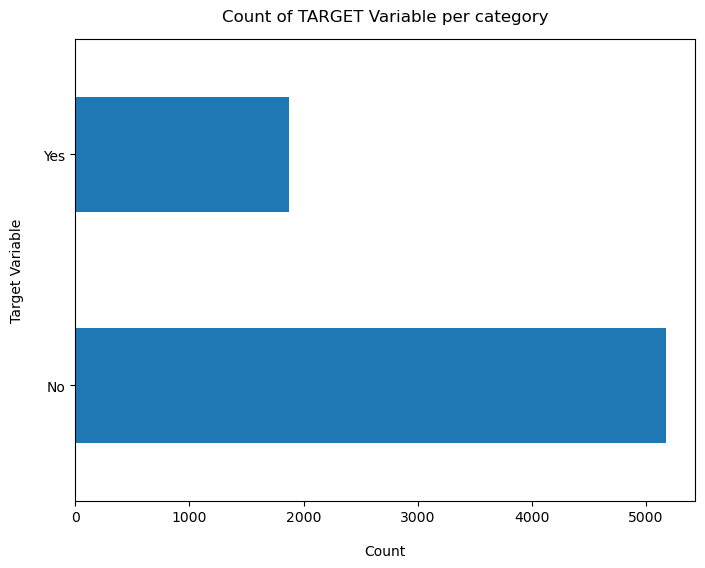

In [17]:
tele_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [18]:
tele_base_data['Churn'].value_counts()/len(tele_base_data['Churn'])

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [19]:
tele_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [27]:
#To check null values in data
tele_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

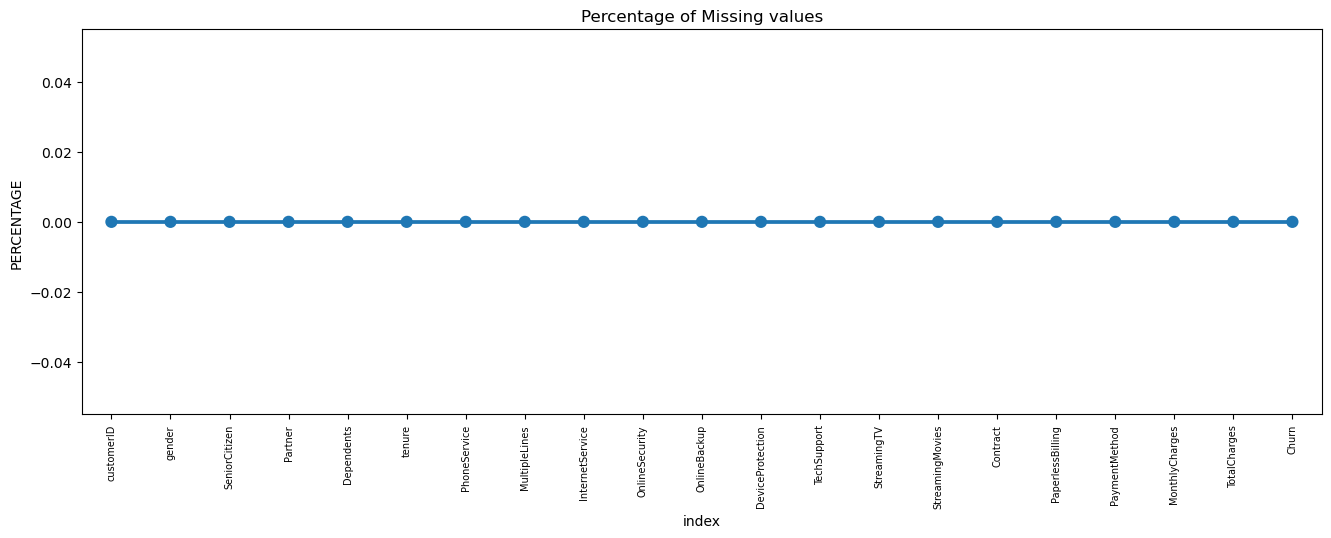

In [35]:
missing = pd.DataFrame((tele_base_data.isnull().sum())*100/tele_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# FOR MY INSTITUTION OF ABOVE GRAPH
   
   There is a No Null values here
- Few missing values:
  - Fill them using averages or predict them with regression.

- Lots of missing values:
  - It's often best to just drop those columns.
  - If a column has over 30-40% missing, consider dropping it.
  - But be cautious: Some columns might still be important even with missing data. For instance, 'Car_Type' might have many missing values for non-car owners, but it's still useful for understanding car preferences.

# DataCleaning

to create a copy of the data

In [37]:
tele_data=tele_base_data.copy()

TO CONVERT THE OBJECT VALUE INTO NUMERIC VALUES

In [39]:
tele_data.TotalCharges=pd.to_numeric(tele_data.TotalCharges ,errors='coerce')
tele_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total charges has11 null values . but in previous process it shows no null values .here show error because object values is  changed to numerical values 

In [41]:
tele_data.loc[tele_data['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#TO DEALING THE MISSING VALUES

Here 0.15% are nan values .It is less than 1 % so we better to ignore it . if nan values is greater than 1% we do a nan values is replaced by a mean or mode

In [42]:
tele_data.dropna(how='any',inplace=True)
tele_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


To Notice the tenure values is continous so we use the FEATURE BINING Here

In [43]:
tele_data['tenure'].max()

72

In [55]:
#Group the tenure in bins of 12 months
labels =["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
tele_data['Tenure_bin']=pd.cut(tele_data.tenure,range(1,80,12),right=False,labels=labels)

In [56]:
tele_data['Tenure_bin'].value_counts()

Tenure_bin
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

Remove the columns which is not important for analysis using domain knoweledge 

In [57]:
tele_data.drop(columns=['customerID','tenure'],axis=1,inplace=True)

In [58]:
tele_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure bin,Tenure_bin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12,1-12


# DATA EXPLORATION

# univariate analysis

In [60]:
tele_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure bin,Tenure_bin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12,1-12


In [64]:
tele_data.Churn.value_counts()/len(tele_data)

Churn
No     0.734215
Yes    0.265785
Name: count, dtype: float64

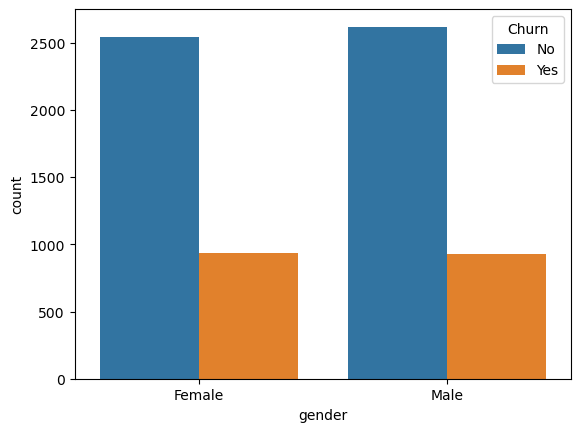

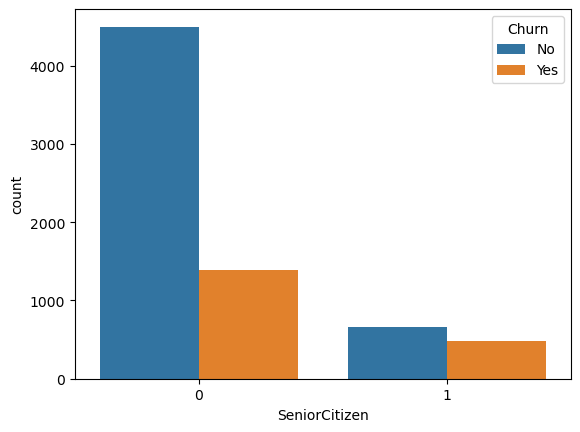

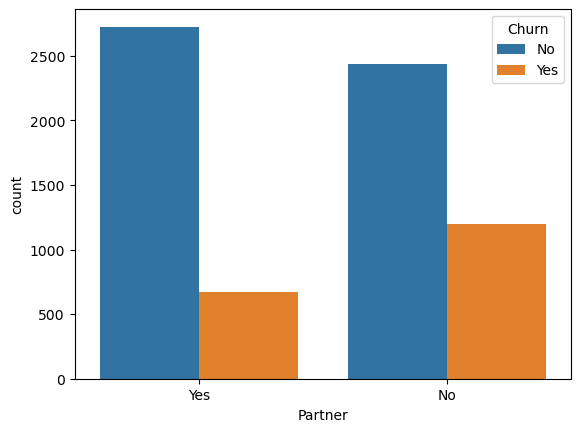

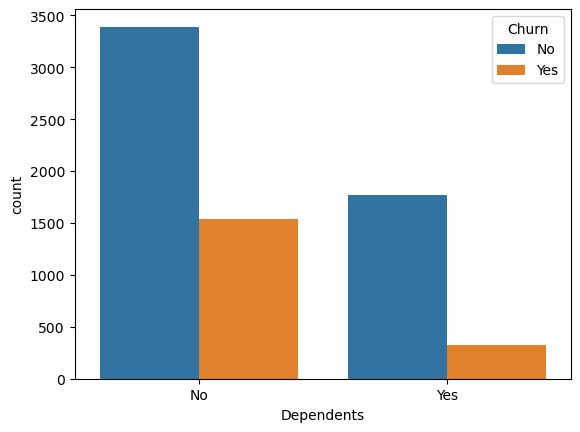

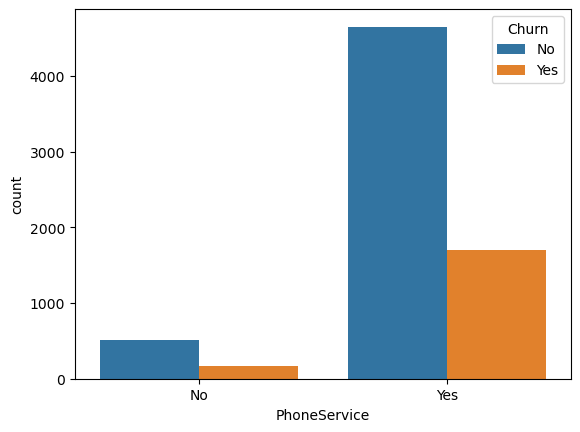

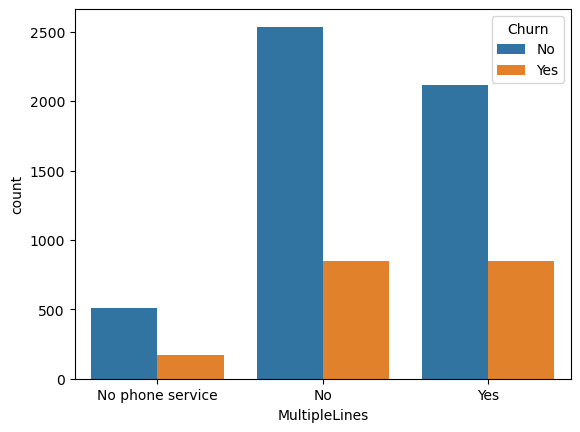

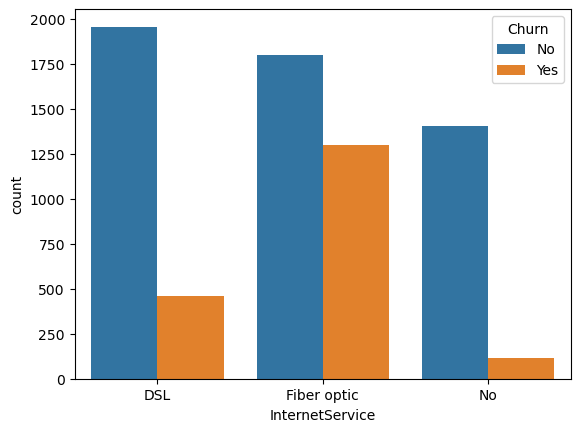

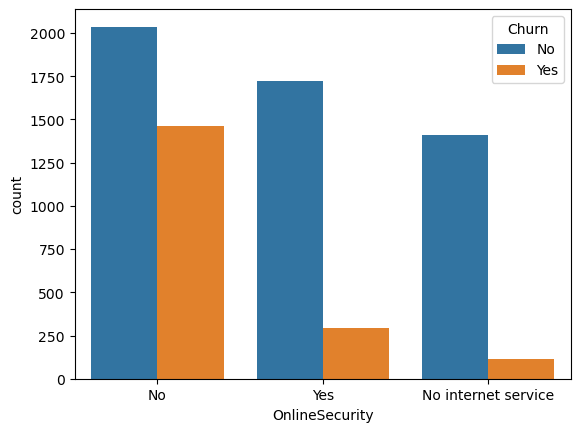

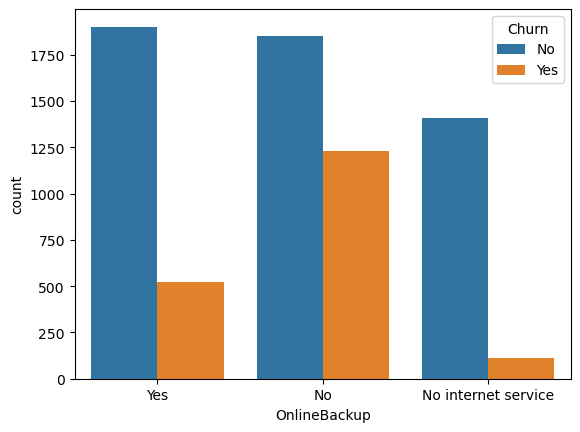

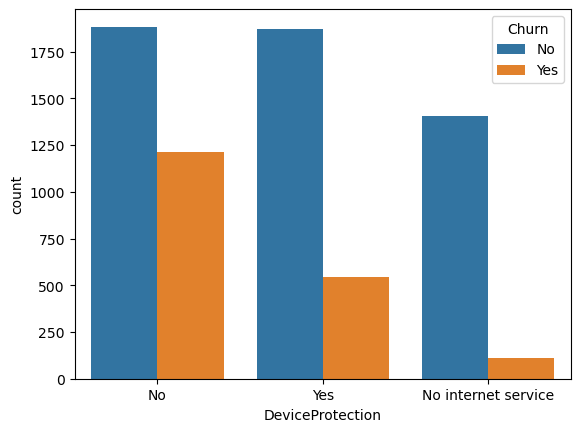

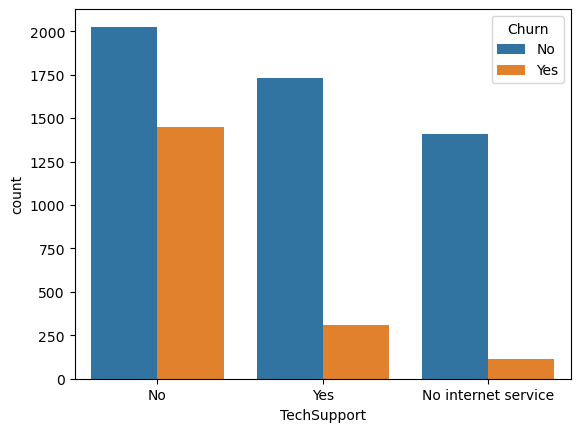

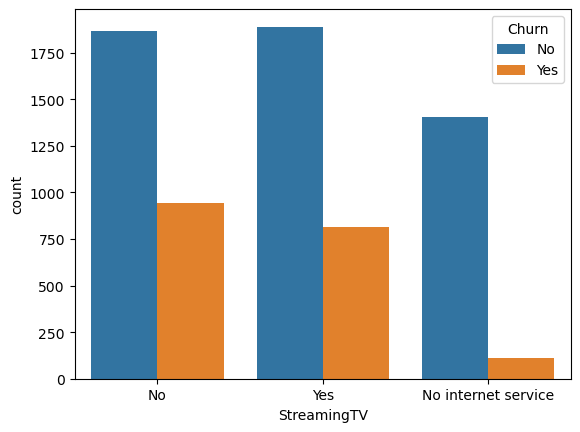

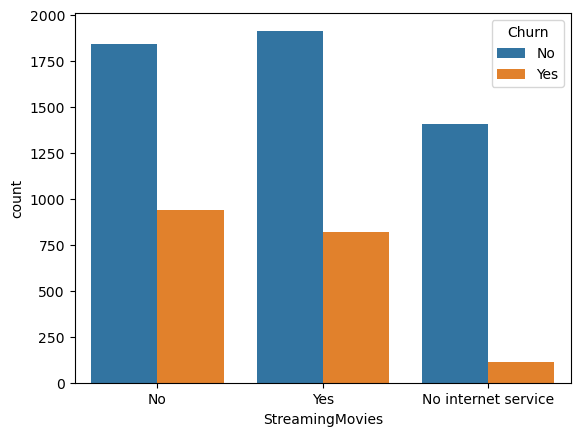

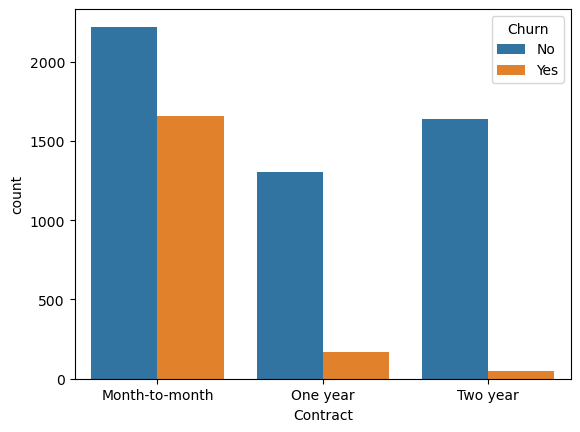

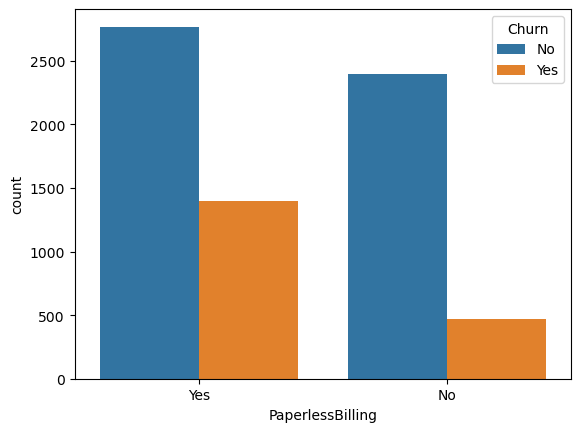

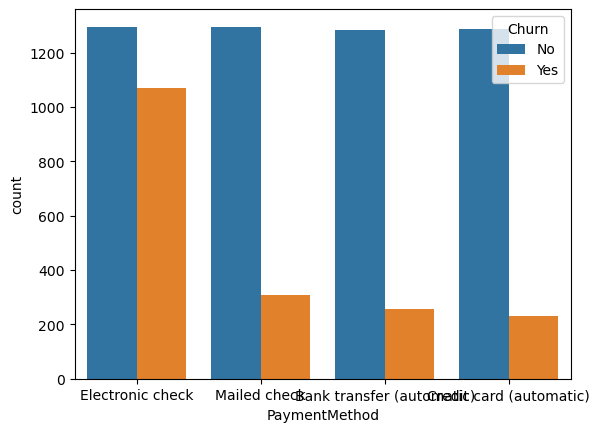

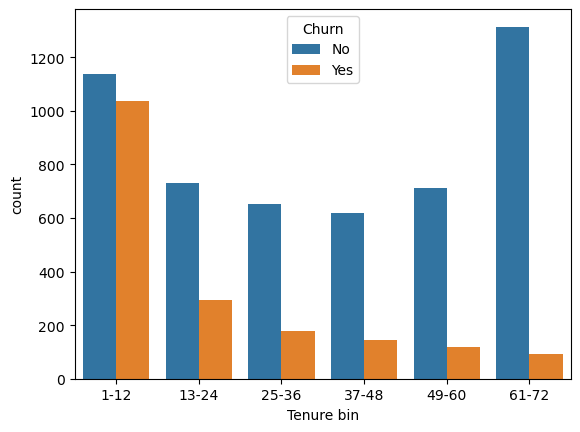

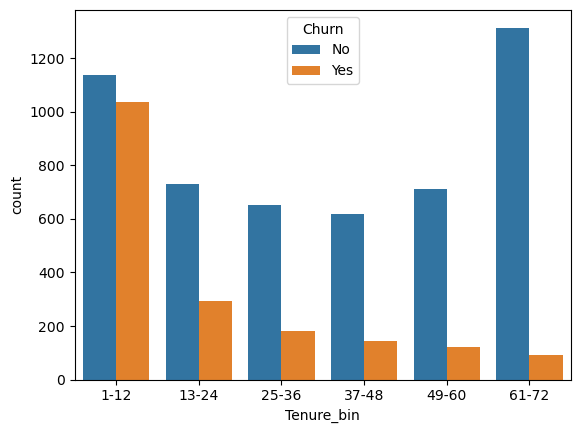

In [63]:
#Iteratethe all columns using for loop
for i,predictor in enumerate(tele_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=tele_data,x=predictor,hue='Churn')

# SOME  ANALYSIS USING ABOVE THE GRAPH

1. Total churn rate in the total data set is Nearly 26%
2. Gender is not a Trigger Points for churn .so age is not a factor.No age do some impact with other columns
3. Senior citizen is more likely to churn because it hasa churn rate above 40%
4. People with No partner are more likely to Churn Nearly 35%
5. People with Dependent are more likely to churn nearly 31.25%
6. Most of the monthly customers are churned 
7. People who pay via electronic check are more likely to Churn

# NUMERICAL ANALYSIS

In [65]:
tele_data.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [73]:
new_df1_target0=tele_data.loc[tele_data["Churn"]==0]
new_df1_target1=tele_data.loc[tele_data["Churn"]==1]

In [74]:
new_df1_target1.gender.value_counts()

Series([], Name: count, dtype: int64)

In [75]:
pd.crosstab(tele_data.PaymentMethod,tele_data.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


Convert the target variable churn in to numeric for a correlation

In [76]:
tele_data['Churn']=np.where(tele_data.Churn == "Yes",1,0)
tele_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure bin,Tenure_bin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12,1-12


Convert all the Categorical data in to numerical values Here we do dummy_encoding

In [80]:
new_tele_data_dummy=pd.get_dummies(tele_data,dtype=int)

In [81]:
new_tele_data_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Tenure bin_25-36,Tenure bin_37-48,Tenure bin_49-60,Tenure bin_61-72,Tenure_bin_1-12,Tenure_bin_13-24,Tenure_bin_25-36,Tenure_bin_37-48,Tenure_bin_49-60,Tenure_bin_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Relationship between the monthly charges and totaly charges

E:\anoconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


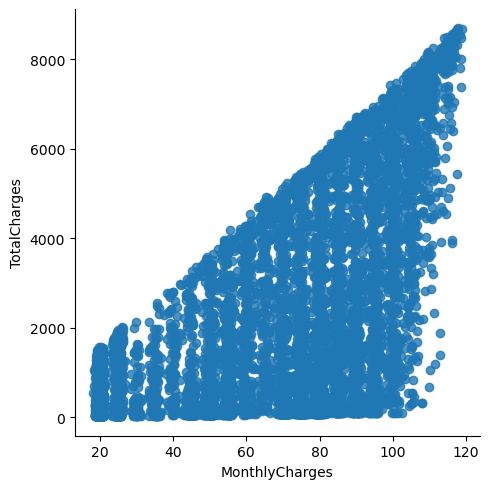

In [86]:
sns.lmplot(data=new_tele_data_dummy,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [87]:
new_tele_data_dummy['MonthlyCharges'].corr(new_tele_data_dummy['TotalCharges'])

0.6510648032262024

This Shows The POSITIVE CORRELATION BY NUMERICAL AND SCHEMATIC

# Analysis using graph

8.Monthly charges is increases and total_charges also increases it is positively correlated

C:\Users\Karth\AppData\Local\Temp\ipykernel_12720\412396896.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_tele_data_dummy.MonthlyCharges[(new_tele_data_dummy["Churn"] == 0)], color="Red", shade=True)
C:\Users\Karth\AppData\Local\Temp\ipykernel_12720\412396896.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_tele_data_dummy.MonthlyCharges[(new_tele_data_dummy["Churn"] == 1)], ax=Mth, color="Blue", shade=True)


Text(0.5, 1.0, 'Monthly charges by churn')

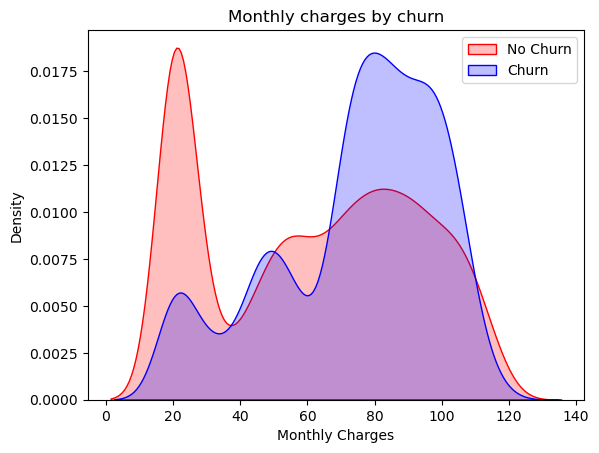

In [93]:
Mth = sns.kdeplot(new_tele_data_dummy.MonthlyCharges[(new_tele_data_dummy["Churn"] == 0)], color="Red", shade=True)
Mth = sns.kdeplot(new_tele_data_dummy.MonthlyCharges[(new_tele_data_dummy["Churn"] == 1)], ax=Mth, color="Blue", shade=True)
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


9. Monthly charges are high when Churn also High

C:\Users\Karth\AppData\Local\Temp\ipykernel_12720\4220912635.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_tele_data_dummy.TotalCharges[(new_tele_data_dummy["Churn"] == 0) ],
C:\Users\Karth\AppData\Local\Temp\ipykernel_12720\4220912635.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_tele_data_dummy.TotalCharges[(new_tele_data_dummy["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

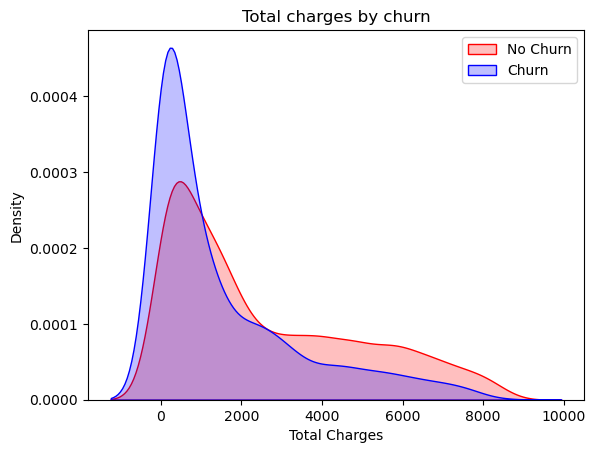

In [95]:
Tot = sns.kdeplot(new_tele_data_dummy.TotalCharges[(new_tele_data_dummy["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(new_tele_data_dummy.TotalCharges[(new_tele_data_dummy["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

10. Total charges is low The Churn is High

Build a correlation of all predictors with Churns

<Axes: >

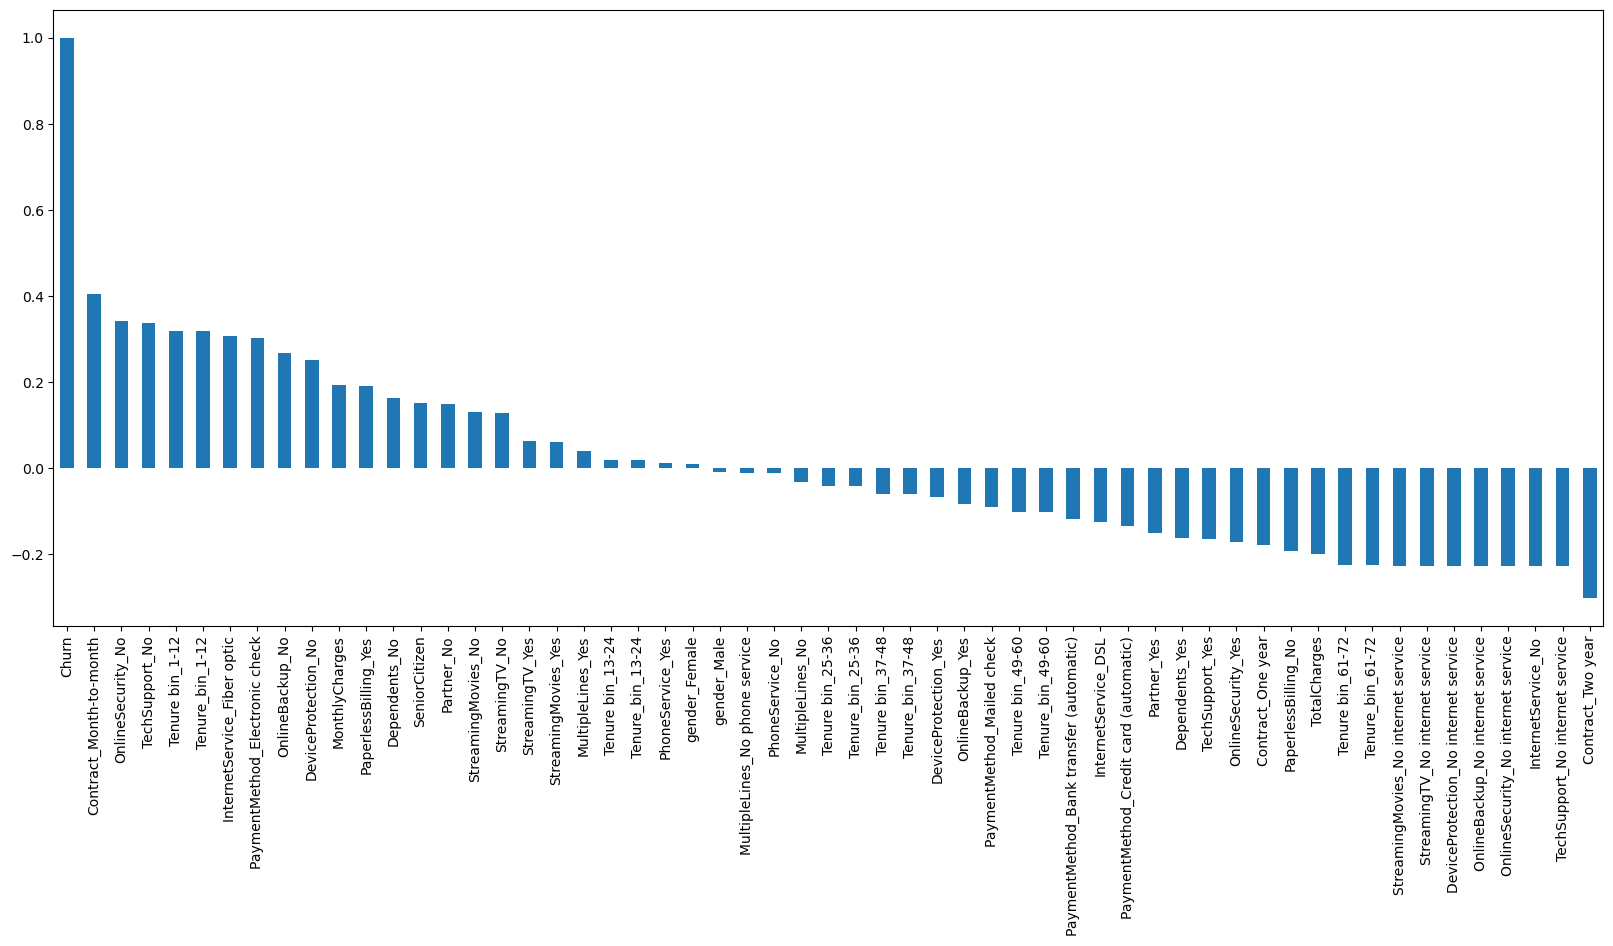

In [99]:
plt.figure(figsize=(20,8))
new_tele_data_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

11.HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

12.LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

13.Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

<Axes: >

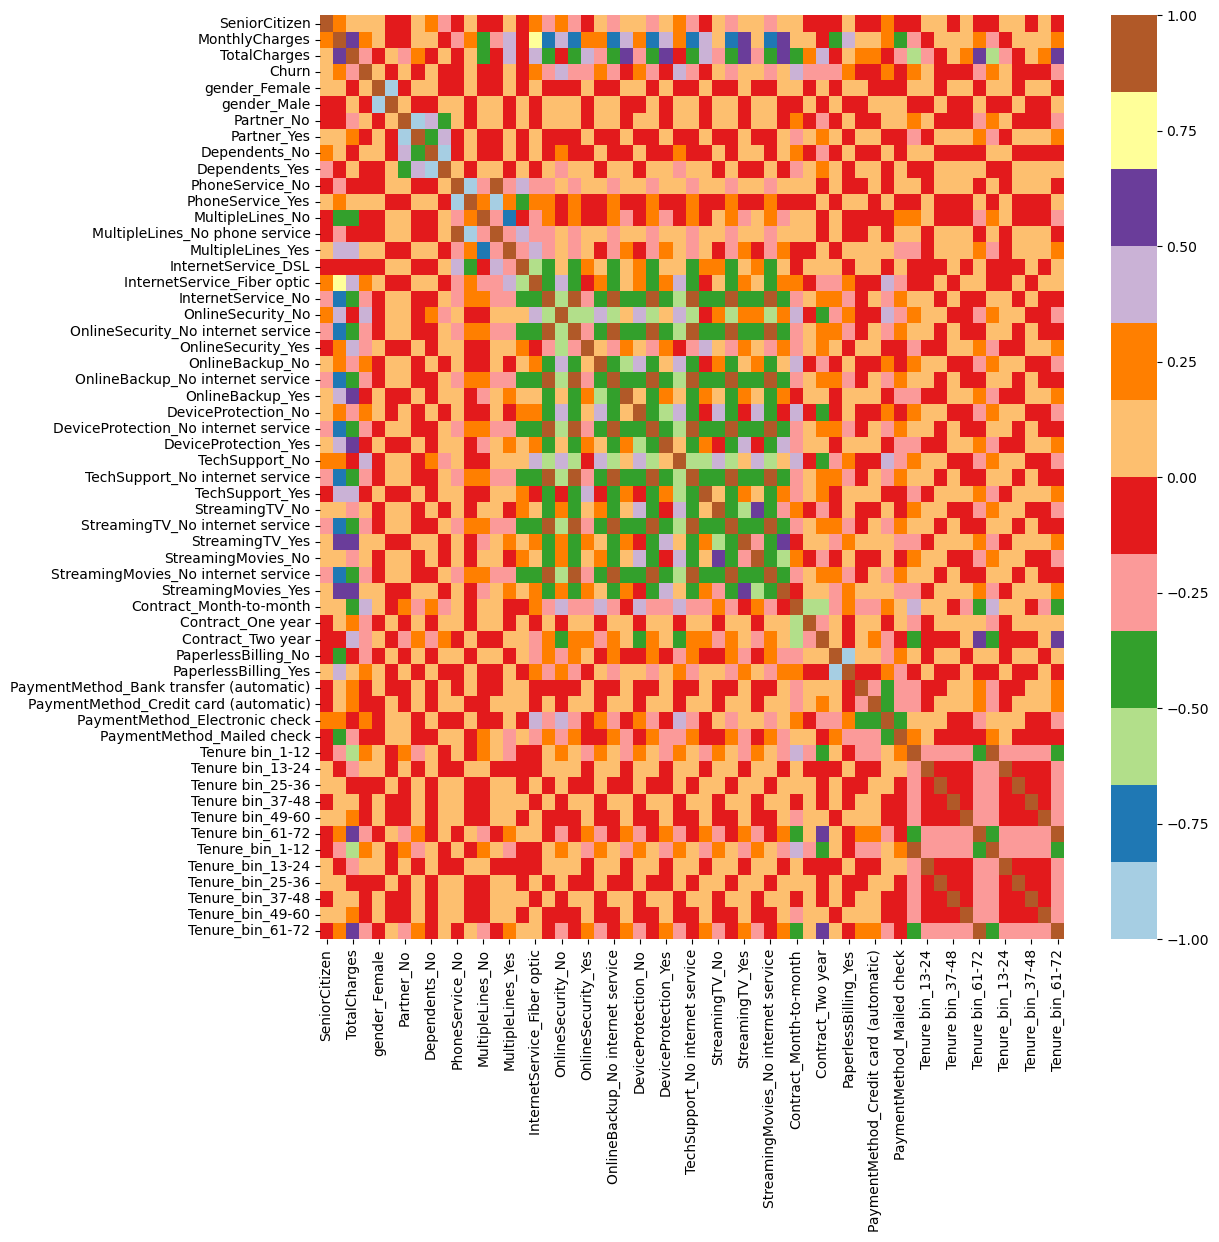

In [102]:
plt.figure(figsize=(12,12))
sns.heatmap(new_tele_data_dummy.corr(),cmap="Paired")

# BIVARIATE ANALYSIS

In [103]:
new_df1_target0=tele_data.loc[tele_data["Churn"]==0]
new_df1_target1=tele_data.loc[tele_data["Churn"]==1]

In [104]:
len(new_df1_target0)

5163

In [105]:
len(new_df1_target1)

1869

In [106]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

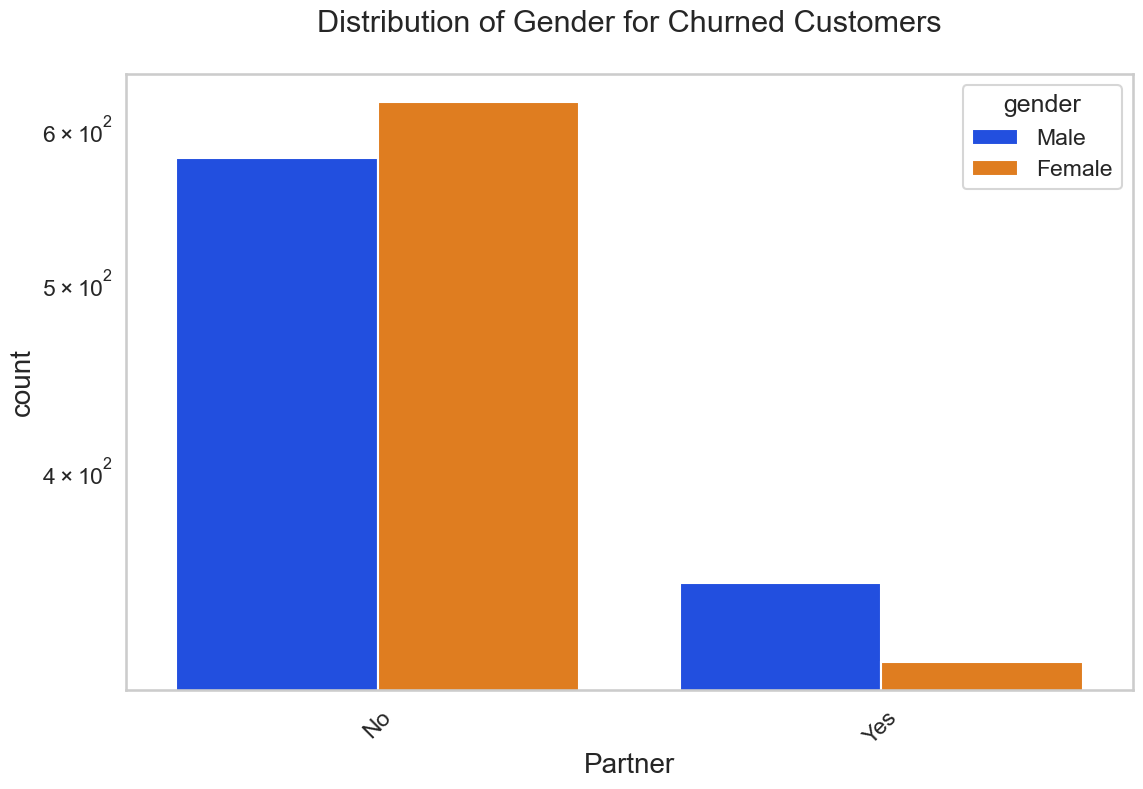

In [108]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

14. Female with No Partners have more churned and male  with partners have more churned

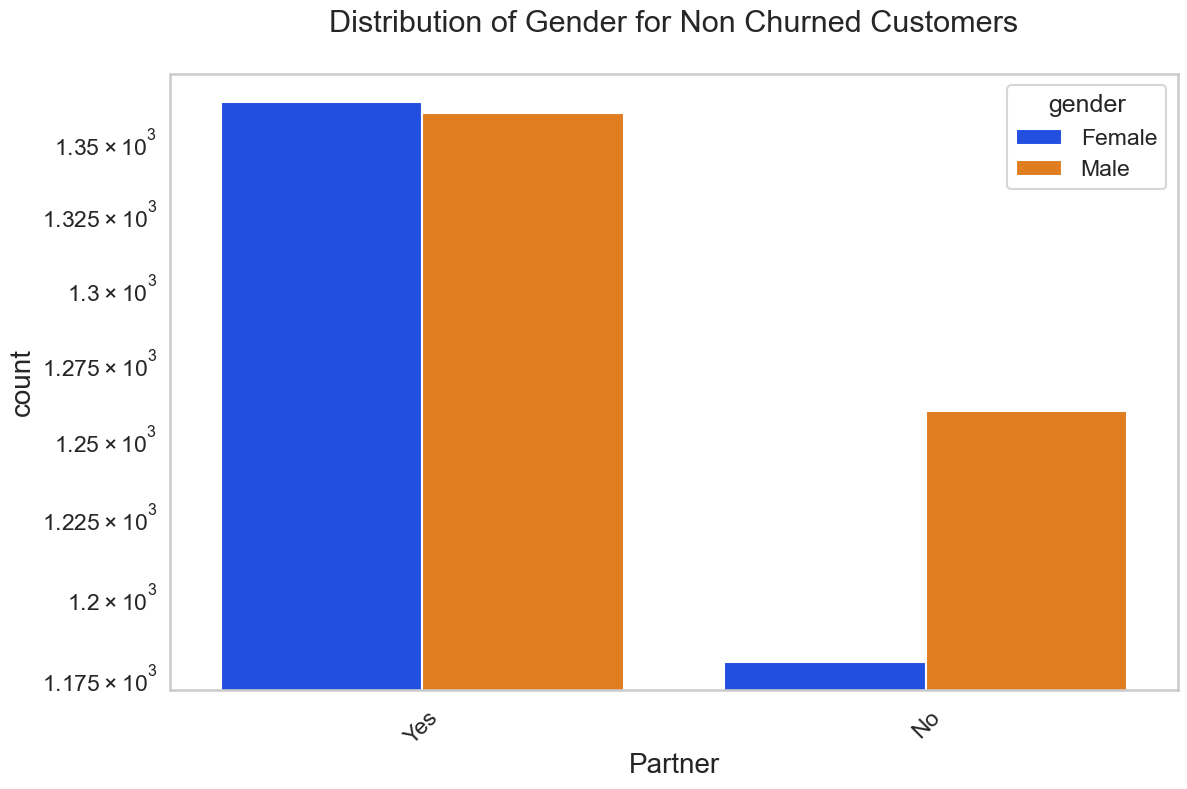

In [109]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

15. Male with No Partners have non churned and Female  with partners have non churned

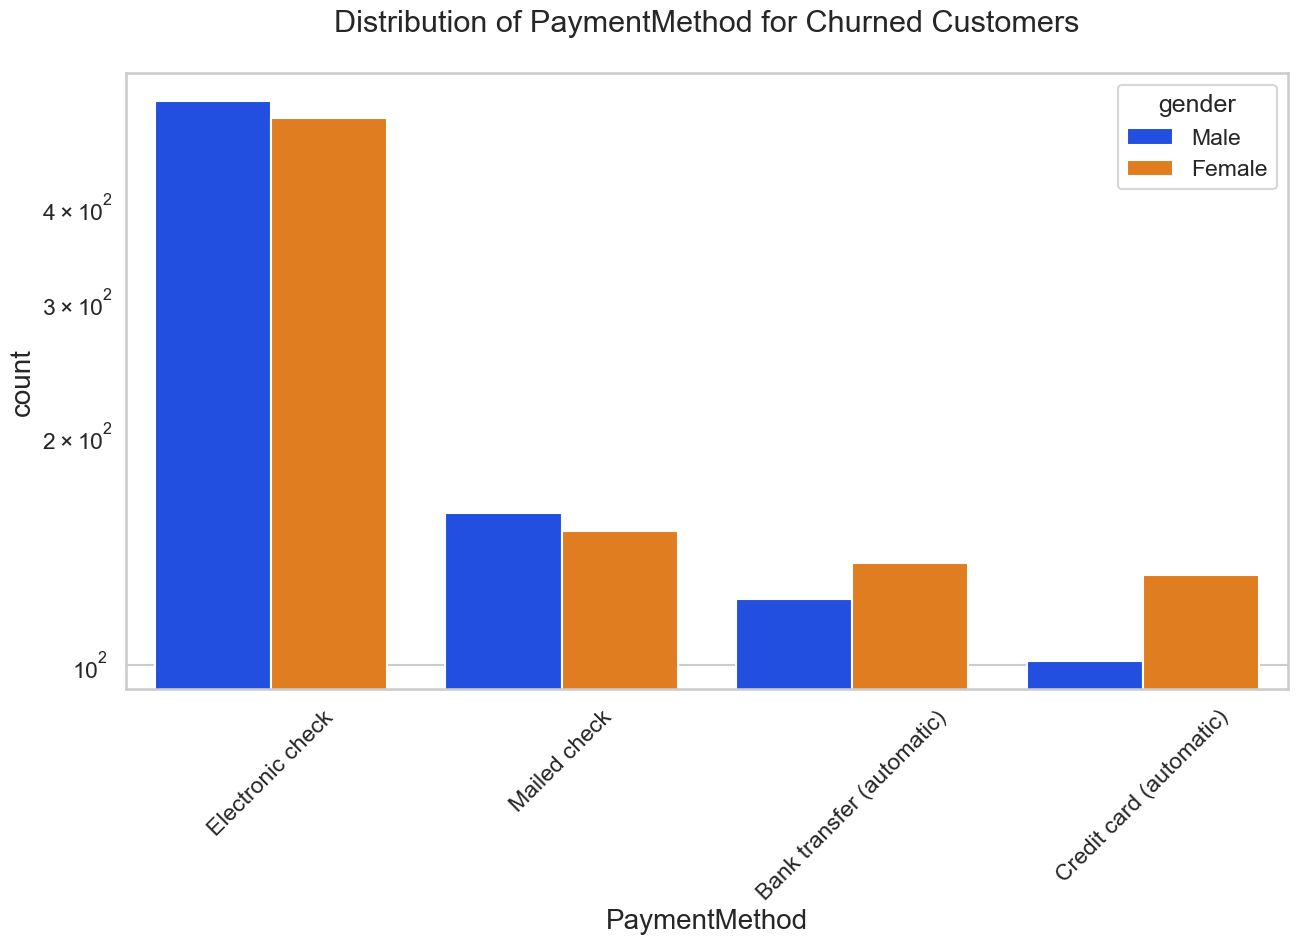

In [110]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

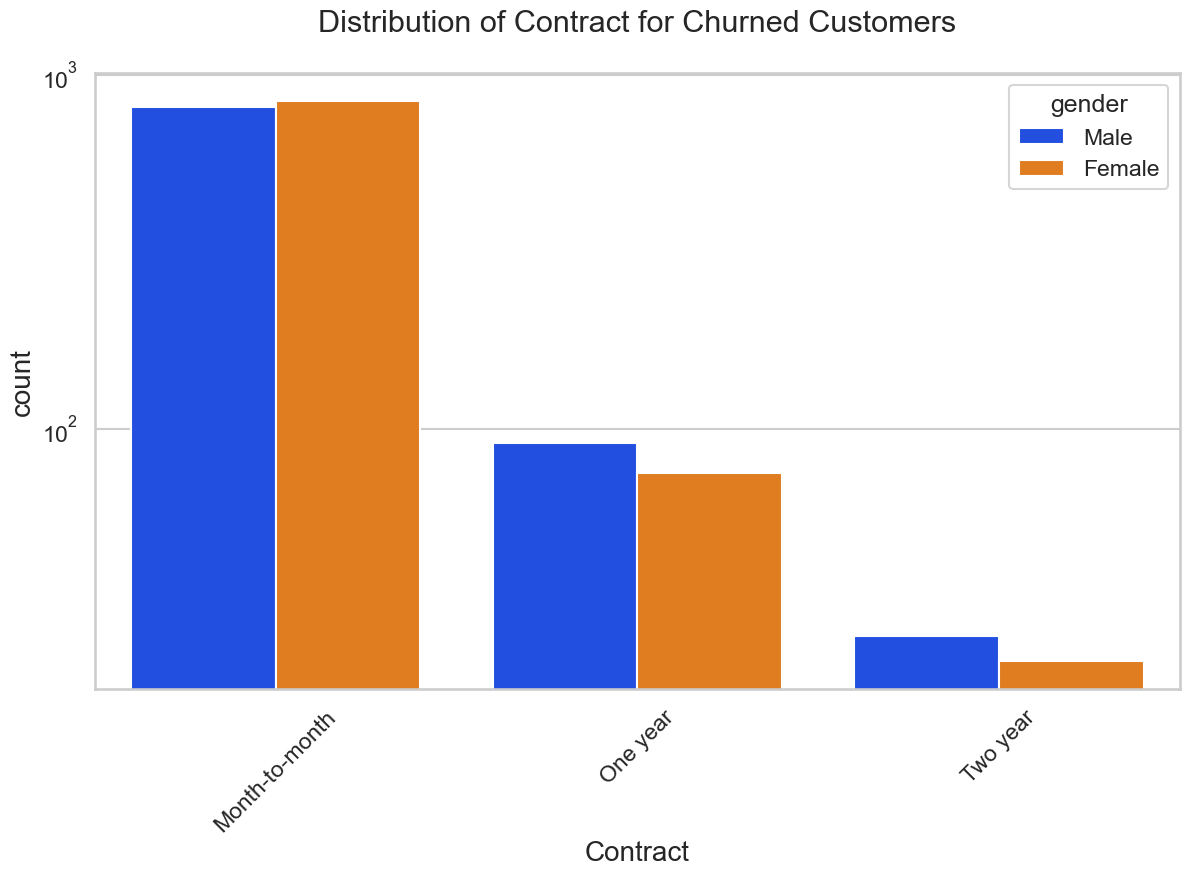

In [111]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

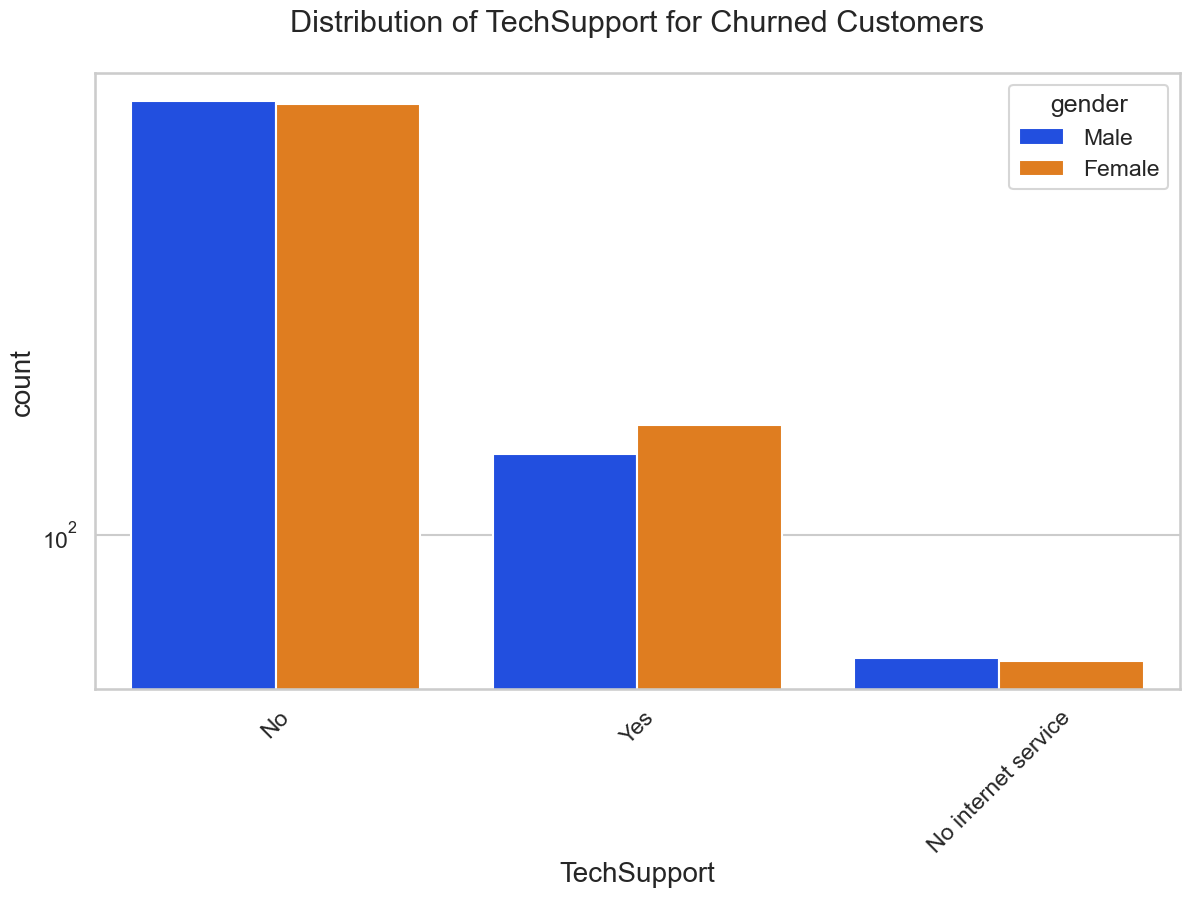

In [112]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

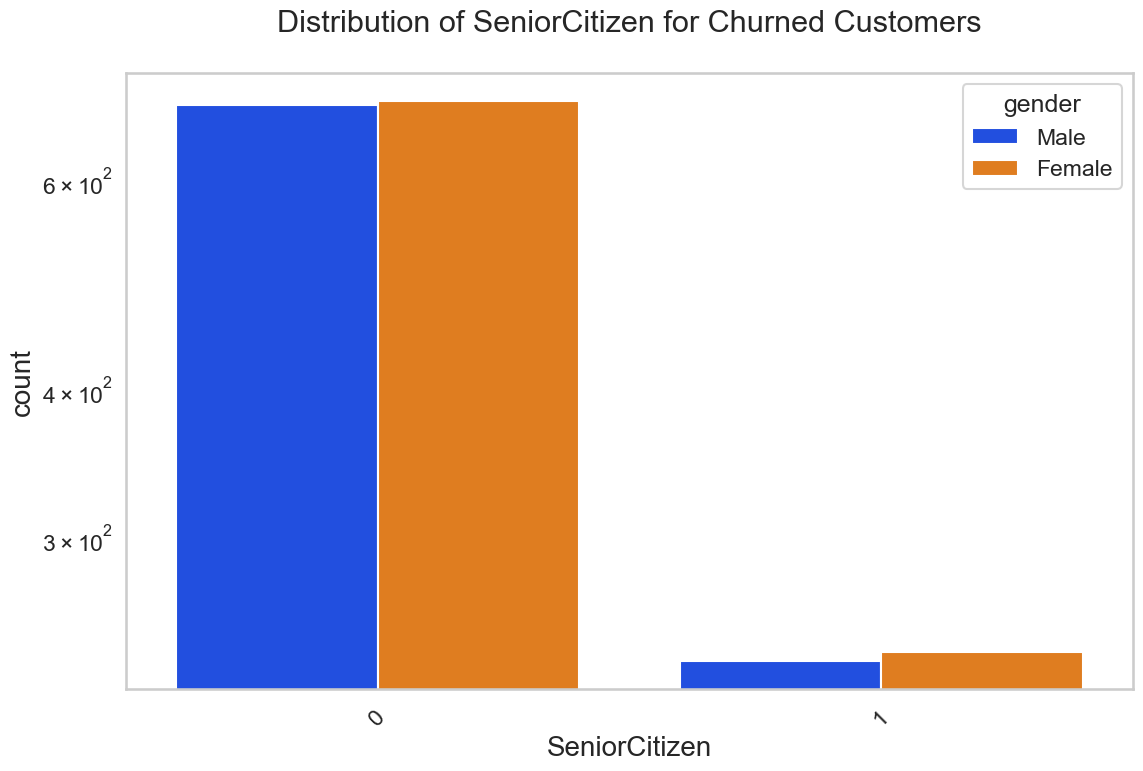

In [113]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION OF FINAL IMPORTANT INSIGHTS

1. 📉 Total churn rate: Approximately 26% of customers churned.
2. 🚹 Gender not impactful: Gender doesn't significantly affect churn; age plays a minor role with other factors.
3. 👴 Senior citizen churn: Senior citizens have a churn rate of over 40%, indicating higher likelihood to churn.
4. 💔 No partner churn: Customers without partners exhibit nearly 35% churn rate.
5. 👨‍👩‍👧‍👦 Dependents and churn: Customers with dependents show around 31.25% churn rate.
6. 📅 Monthly subscribers churn: Most churn occurs among monthly customers.
7. 💳 Electronic check payment: Customers using electronic check payment method have higher churn.
8. 💰 Positive correlation: Monthly charges and total charges both increase, indicating positive correlation.
9. 💸 High monthly charges, high churn: Higher monthly charges correspond to higher churn.
10. 💳 Low total charges, high churn: Lower total charges are associated with higher churn.
11. 📅 Contract and service impact: High churn seen in month-to-month contracts, lack of online security, no tech support, first year of subscription, and fiber optics internet.
12. 📅 Low churn factors: Long-term contracts, subscriptions without internet, and customers engaged for 5+ years have low churn.
13. 🤷‍♂️ Minimal impact: Factors like gender, phone service availability, and number of multiple lines have little to no impact on churn.
14. 💔 Female, no partner churn: Females without partners show higher churn; males with partners also show higher churn.
15. ❤️ Male, no partner loyalty: Males without partners exhibit less churn; females with partners also exhibit less churn.

C:\Users\Karth
